In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\udit2\Documents\GitHub\Assignment\Resources\amazon.csv')

In [2]:
#Convert ₹ and % into numric values
def clean_price_column(column):
    return df[column].replace('[₹,%]','',regex=True).replace(',','',regex=True).astype(float)

In [3]:
df['discounted_price'] = clean_price_column('discounted_price')
df['actual_price'] = clean_price_column('actual_price')
df['discount_percentage'] = clean_price_column('discount_percentage')
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')
df['rating_count'] = df['rating_count'].replace(',','',regex=True).astype(float)

df['main_category'] = df['category'].str.split('|').str[0]

1.  What is the average rating for each product category?

In [ ]:
avg_rating_by_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


C:\Users\udit2\AppData\Local\Temp\ipykernel_7536\2590615957.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.values,y=avg_rating_by_category.index,palette='viridis')


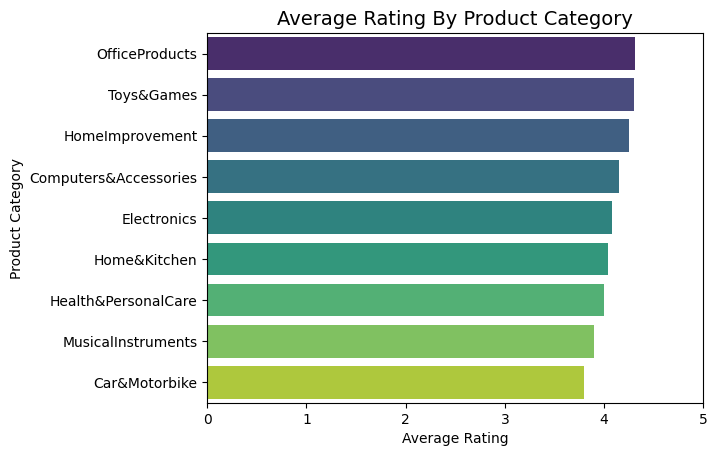

In [5]:
sns.barplot(x=avg_rating_by_category.values,y=avg_rating_by_category.index,palette='viridis')
plt.title("Average Rating By Product Category",fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.xlim(0,5)
plt.show()

2.  What are the top rating_count products by category?

In [6]:
top_rating_count_by_category =df.loc[df.groupby('main_category')['rating_count'].idxmax()][['main_category','product_name','rating_count']]
top_rating_count_by_category

,main_category,product_name,rating_count
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0
982,HomeImprovement,"Gizga Essentials Cable Organiser, Cord Managem...",5985.0
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0
659,OfficeProducts,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,12179.0
924,Toys&Games,Faber-Castell Connector Pen Set - Pack of 25 (...,15867.0


3. What is the distribution of discounted prices vs. actual prices?

<Axes: ylabel='Count'>

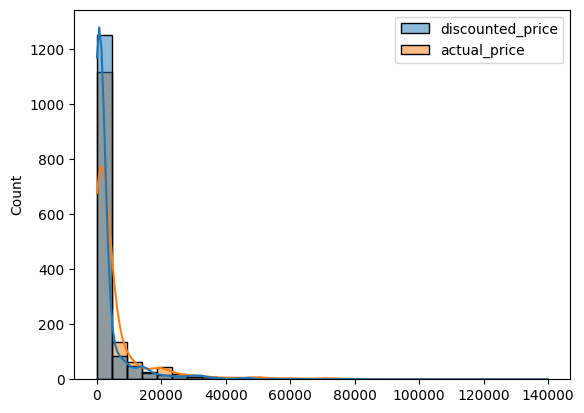

In [7]:
sns.histplot(df[['discounted_price','actual_price']],bins=30,kde=True)

4.How does the average discount percentage vary across categories?

In [8]:
avg_dicount_by_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
avg_dicount_by_category

main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64

5. What are the most popular product names?

In [9]:
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(5).reset_index()
popular_products

,product_name,rating_count
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
3,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0


 6. What are the most popular product keywords?

In [10]:
import collections
all_keyword = df['about_product'].dropna().str.cat(sep=' ').lower().split()
custom_stopwords = set(['and', 'the', 'to', 'with', 'for', 'of', 'a', 'your', 'is', 'in', 'on', 
    'it', 'this', 'that', '|', '-', '&', 'from', 'by', 'an', 'as', 'at', 'be','you','or','can','not'])
filtered_keywords = [word for word in all_keyword if word.isalpha() and word not in custom_stopwords]
common_keyword = collections.Counter(filtered_keywords).most_common(10)
common_keyword

[('usb', 969),
 ('cable', 706),
 ('up', 599),
 ('charging', 548),
 ('power', 438),
 ('warranty', 434),
 ('all', 432),
 ('easy', 418),
 ('any', 387),
 ('which', 374)]

 7. What are the most popular product reviews?

In [11]:
popular_reviews = df['review_content'].value_counts().head(5).reset_index()
print(popular_reviews)

                                      review_content  count
0  I am not big on camera usage, personally. I wa...      8
1  Worked on iPhone 7 and didn’t work on iPhone X...      7
2  I ordered this cable to connect my phone to An...      7
3  Good product,long wire,Charges good,Nice,I bou...      7
4  128GB SD Card is showing 134GBDon't buy this p...      6


 8. What is the correlation between discounted_price and rating?

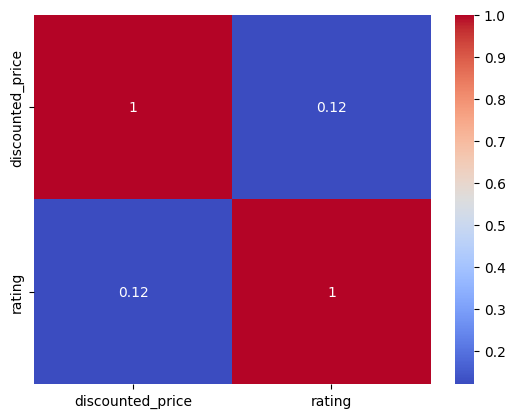

In [15]:
correlation = df[['discounted_price','rating']].corr()
sns.heatmap(correlation,annot=True ,cmap='coolwarm')
plt.show()

In [16]:
correlation.iloc[0,1]

0.12033741712288648

9. What are the Top 5 categories based on the highest ratings?

In [23]:
top_5_rated_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
top_5_rated_category.head(5).reset_index()

,main_category,rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [41]:
low_rated_high_review = df[(df['rating'] <= 3.4) & (df['rating_count'] > 5000)]
low_rated_high_review['product_name'].reset_index()

,index,product_name
0,45,Wecool Nylon Braided Multifunction Fast Chargi...
1,744,"Zebronics ZEB-90HB USB Hub, 4 Ports, Pocket Si..."
2,857,Wecool Nylon Braided Multifunction Fast Chargi...
3,870,LS LAPSTER Quality Assured Universal Silicone ...
4,921,Canon PIXMA MG2577s All-in-One Inkjet Colour P...
5,1036,PRO365 Indo Mocktails/Coffee Foamer/Cappuccino...


These are the six products which needs improvement so that they get higher rating